In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#DATA PREPARATION

In [3]:
#importing the data set
MBA = pd.read_csv(r'C:\Users\HP\Downloads\MBA.csv')


In [4]:
Ecommerce_data = MBA

In [5]:
Ecommerce_data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [6]:
Ecommerce_data.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [7]:
print(Ecommerce_data.head())


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [8]:
#EXPLORATORY DATA ANALYSIS(EDA)

In [9]:
#renaming the item description colunm using snake case
Ecommerce_data.rename(columns={'itemDescription': 'item_description'}, inplace=True)

In [10]:
print(Ecommerce_data.head())

   Member_number        Date  item_description
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


In [11]:
print(Ecommerce_data.dtypes)

Member_number        int64
Date                object
item_description    object
dtype: object


In [12]:
#changine the datatype of the date to an appropriate obe
Ecommerce_data['Date'] = pd.to_datetime(Ecommerce_data['Date'], format='%d-%m-%Y')


In [13]:
print(Ecommerce_data.dtypes)

Member_number                int64
Date                datetime64[ns]
item_description            object
dtype: object


In [14]:
#checking for null values
Ecommerce_data.isnull().sum()

Member_number       0
Date                0
item_description    0
dtype: int64

In [15]:
Ecommerce_data

,Member_number,Date,item_description
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk
...,...,...,...
38760,4471,2014-10-08,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-12-03,fruit/vegetable juice


In [16]:
# PRODUCT CATEGORY DISTRIBUTION USING PIE CHART AND A BAR CHART

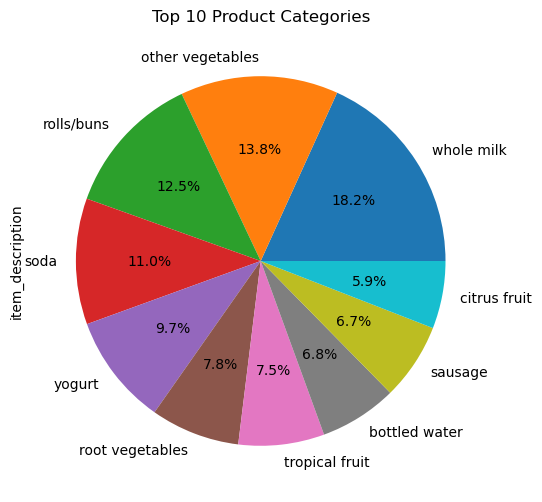

In [17]:
plt.figure(figsize=(6, 6))

# Set the number of top categories to display
top_n = 10
Ecommerce_data['item_description'].value_counts().head(top_n).plot.pie(autopct='%1.1f%%')
plt.title(f'Top {top_n} Product Categories')

plt.show()


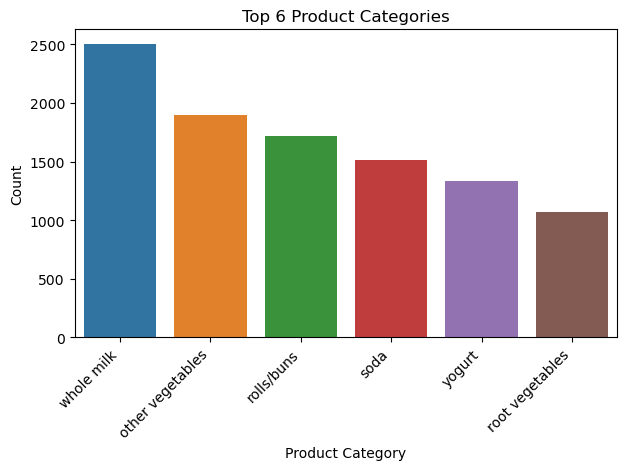

In [18]:
plt.figure(figsize=(7, 4))

top_n = 6

# Bar plot with top N categories
sns.countplot(x='item_description', data=Ecommerce_data, order=Ecommerce_data['item_description'].value_counts().head(top_n).index)
plt.title(f'Top {top_n} Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()


In [19]:
# FREQUENCY DISTRIBUTION OF ITEMS

In [20]:
item_counts = Ecommerce_data['item_description'].value_counts()
print("Item Frequency Distribution:")
print(item_counts)

Item Frequency Distribution:
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: item_description, Length: 167, dtype: int64


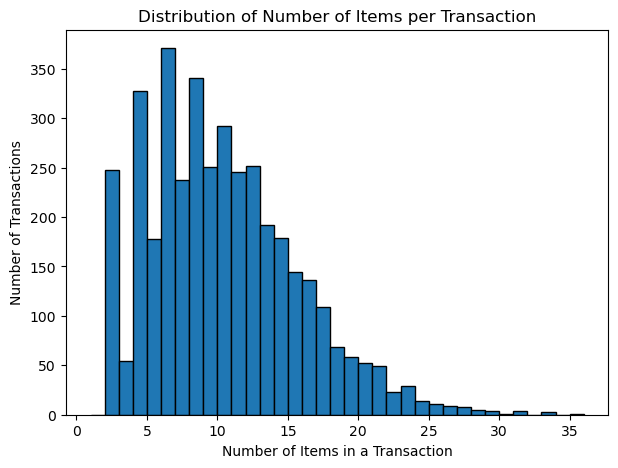

In [21]:
# Visualization of the distribution of the number of items per transaction
transaction_counts = Ecommerce_data.groupby('Member_number')['item_description'].count()

plt.figure(figsize=(7, 5))
plt.hist(transaction_counts, bins=range(1, max(transaction_counts) + 1), edgecolor='black')
plt.xlabel('Number of Items in a Transaction')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Number of Items per Transaction')
plt.show()

In [22]:
# MARKET BASCKET ANALYSIS

In [23]:
#importing necessary libraries

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import apriori, association_rules
#pd.set_option('max_rows',None)
#pd.set_option('max_columns', None)

In [24]:
#Creating a new column that combines the 'Member_number' and 'Date' into a single unique identifier.
#The algorithm relies on identifying patterns and associations between items within the same transaction.

Ecommerce_data['single_transaction'] = Ecommerce_data['Member_number'].astype(str) + '_' + Ecommerce_data['Date'].astype(str)


In [25]:
Ecommerce_data.head()

,Member_number,Date,item_description,single_transaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [26]:
#pivoting the new table created
Ecomm = pd.crosstab(Ecommerce_data['single_transaction'], Ecommerce_data['item_description'])
Ecomm.head()

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#encoding all values into 0 and 1, in other to disregard purchase frequency
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res
    
basket_input = Ecomm.applymap(encode)

In [28]:
# lets discover the frequently bought item combinations from our binary encoded data frame 'Ecomm'
# i am setting the support threshold to 0.005due to the sparcity nature of the data set

frequent_itemsets = apriori(basket_input, min_support=0.005, use_colnames=True)

my_rules = association_rules(frequent_itemsets, metric="lift")

my_rules.sort_values(by='zhangs_metric', ascending=False).head(10)



C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


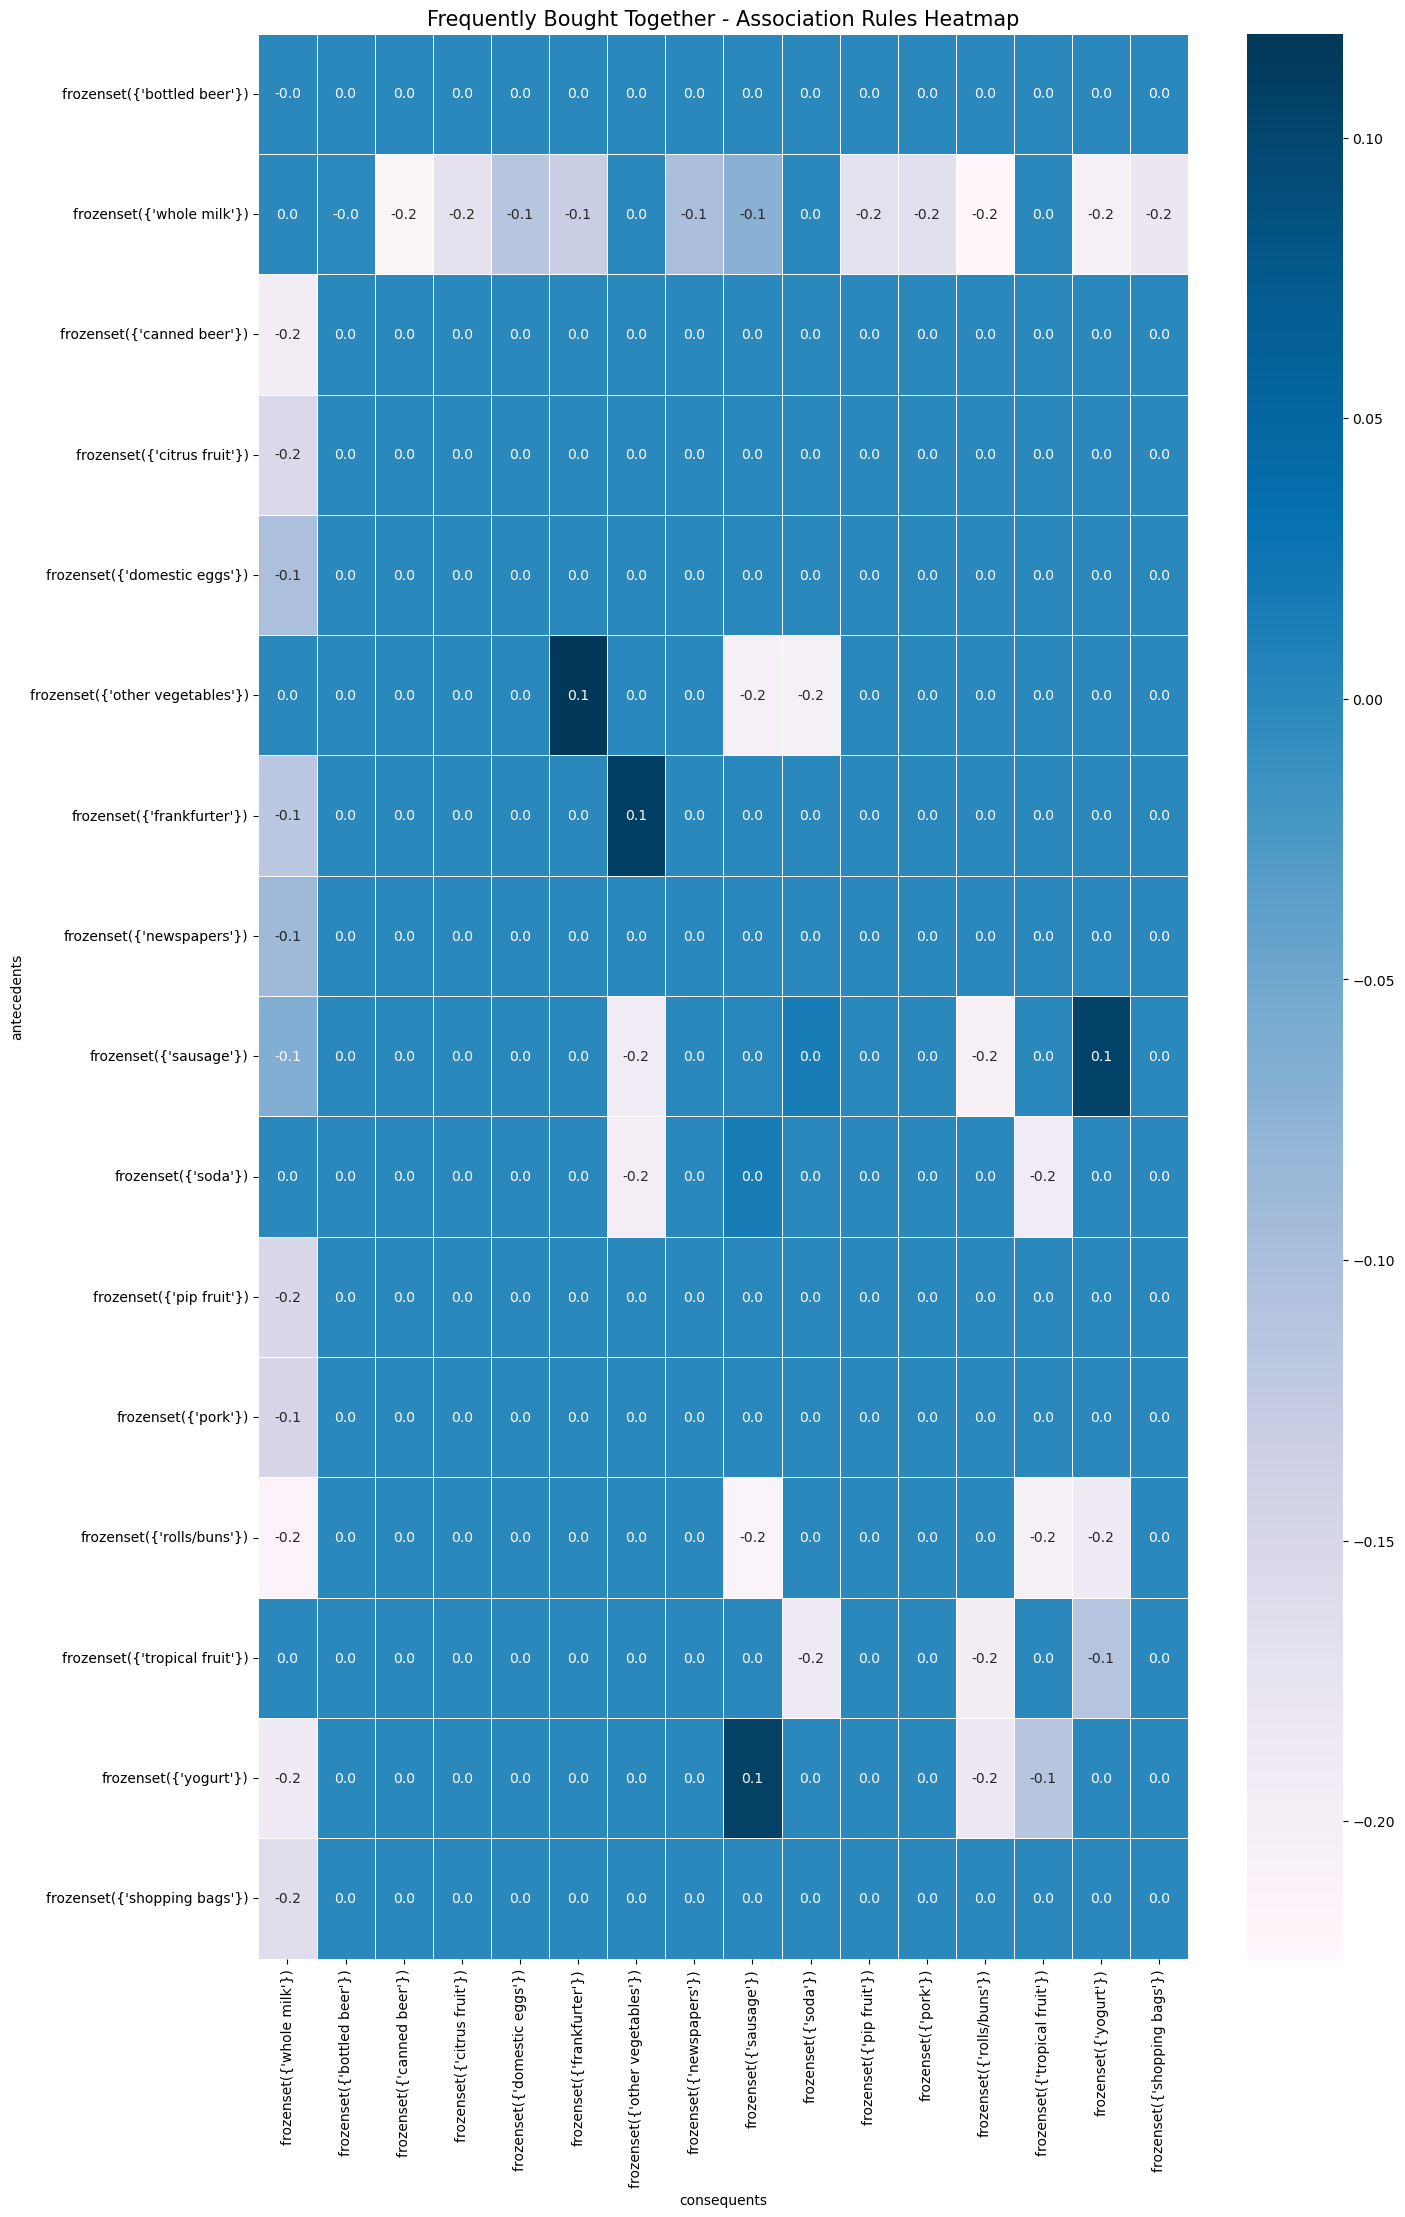

In [29]:
product_associations = my_rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(15, 25))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap", size = 15)
plt.show()


In [30]:
# top 10 frequently bought item combinations
my_rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
27,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
42,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
43,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
17,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
16,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
29,(yogurt),(rolls/buns),0.085879,0.110005,0.007819,0.091051,0.827697,-0.001628,0.979147,-0.185487
28,(rolls/buns),(yogurt),0.110005,0.085879,0.007819,0.071081,0.827697,-0.001628,0.984071,-0.189562


In [31]:
# selecting rows where the value in the 'zhangs_metric' column is greater than 0.
pos_pair = my_rules[my_rules['zhangs_metric'] > 0]

pos_pair.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


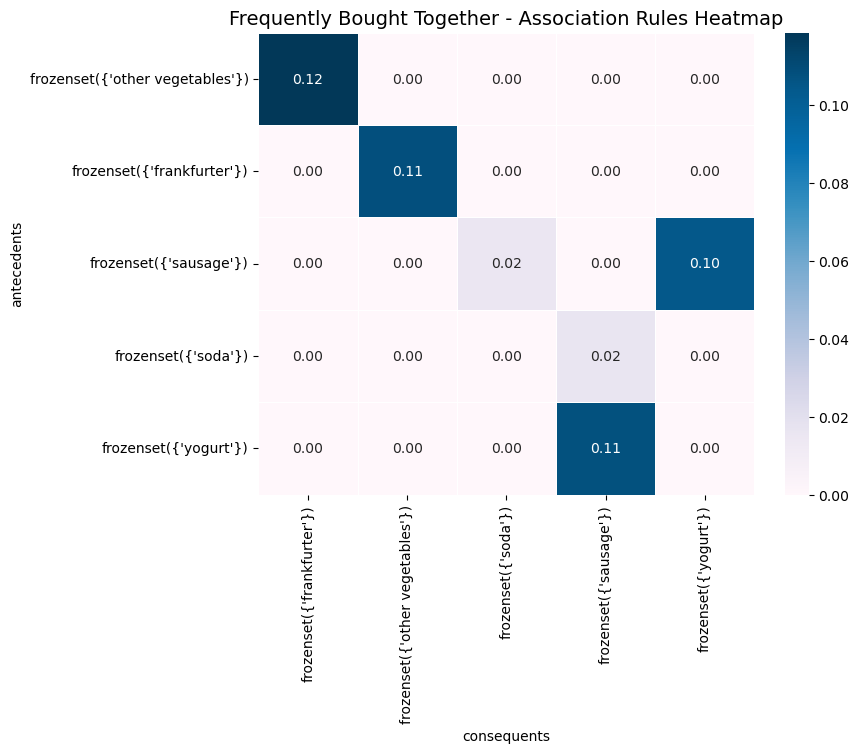

In [37]:
#visualizing the selected dataset using heatmap

pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap", size = 14)
plt.show()

In [33]:
#from the above visualization, we can see the strong association btw some antecedents(products that are already present or bought
#and some consequents(products that are likely to be bought together. And arranging these products together would likely
#improve sales.

#NB: the higher the values, the stronger the association

In [34]:
#RECOMMENDATION

In [35]:
# Assuming 'rules' is your DataFrame of association rules
confidence_threshold = 0.005
filtered_rules = my_rules[my_rules['confidence'] > confidence_threshold]

def generate_recommendations(antecedents):
    recommendations = set()
    for _, rule in filtered_rules.iterrows():
        if set(rule['antecedents']).issubset(antecedents):
            recommendations.update(rule['consequents'])
    return recommendations

# Example usage:
user_purchase = ['tropical fruit', 'whole milk']
recommendations = generate_recommendations(user_purchase)

print("User's Purchase:", user_purchase)
print("Recommendations:", recommendations)


User's Purchase: ['tropical fruit', 'whole milk']
Recommendations: {'pork', 'shopping bags', 'newspapers', 'domestic eggs', 'sausage', 'bottled beer', 'frankfurter', 'pip fruit', 'citrus fruit', 'canned beer', 'rolls/buns', 'soda', 'yogurt'}


In [36]:
#OTHER RECOMMENDATIONS

#1.Promotions Bundling:
  #Creating promotions that bundle frequently purchased items together. For example, offer discounts on 'tropical fruit'
  #and 'whole milk' when purchased with 'domestic eggs' or 'soda'.

#2.Strategic Product Placements:
  #Placing items with high association in close proximity on store shelves.
   # Also encouraging cross-selling by placing 'rolls/buns' and 'sausage' near 'tropical fruit' and 'whole milk'.

#3.Loyalty Programs:
   #Implement loyalty programs that reward customers for purchasing items from recommended sets. 
 
#4.Personalized Recommendations:
  #Implement a recommendation engine on the e-commerce platform to provide personalized suggestions during online shopping, based
  #on the association rules feedback
    
#5. Recipe Suggestions:
  #Providing recipe suggestions based on common item associations could also improve salses
  #For instance, recipes that incorporate 'tropical fruit' and 'whole milk'.